In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize']=[10,8] #setting fig size of plt
pd.options.display.float_format = '{:.2f}'.format #setting display option to display upto two decimals
pd.options.display.max_rows=25 #setting max rows to be displayed
pd.options.display.max_columns=25 #setting max columns to be displayed

In [3]:
df = pd.read_csv("train.csv")

In [4]:
test_df=pd.read_csv("test.csv")

In [5]:
def summary(data):  # function to understand data
    print('Shape of the data : ' ,data.shape)
    return( pd.DataFrame({ 'Dtypes':data.dtypes , 
                            'NAs' : data.isnull().sum(),
                            'Uniques': data.nunique(),
                            "levels":[data[x].unique() for x in data.columns]}))

In [6]:
summary(df)

Shape of the data :  (1460, 81)


,Dtypes,NAs,Uniques,levels
Id,int64,0,1460,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
MSSubClass,int64,0,15,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,..."
MSZoning,object,0,5,"[RL, RM, C (all), FV, RH]"
LotFrontage,float64,259,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan..."
LotArea,int64,0,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."
...,...,...,...,...
MoSold,int64,0,12,"[2, 5, 9, 12, 10, 8, 11, 4, 1, 7, 3, 6]"
YrSold,int64,0,5,"[2008, 2007, 2006, 2009, 2010]"
SaleType,object,0,9,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ..."
SaleCondition,object,0,6,"[Normal, Abnorml, Partial, AdjLand, Alloca, Fa..."


In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

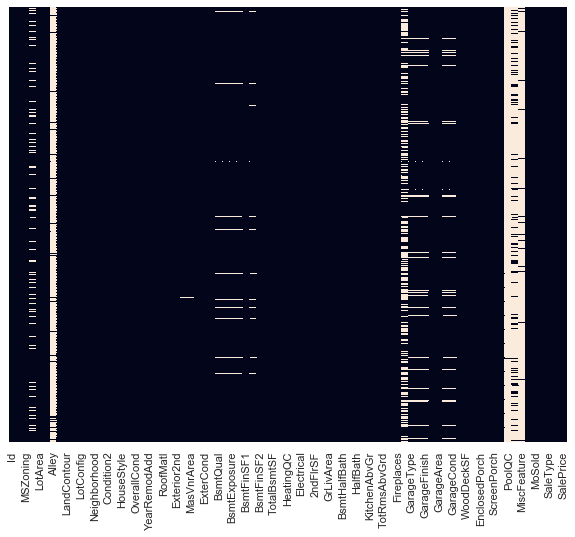

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
print (x if df[x].isnull().sum()>0 for x in df.columns)

SyntaxError: invalid syntax (<ipython-input-11-5dc01e06a6c2>, line 1)

In [12]:
for x in df.columns:
    if df[x].isnull().sum()>0:
        print (x,"--",df[x].isnull().sum())
        

LotFrontage -- 259
Alley -- 1369
MasVnrType -- 8
MasVnrArea -- 8
BsmtQual -- 37
BsmtCond -- 37
BsmtExposure -- 38
BsmtFinType1 -- 37
BsmtFinType2 -- 38
Electrical -- 1
FireplaceQu -- 690
GarageType -- 81
GarageYrBlt -- 81
GarageFinish -- 81
GarageQual -- 81
GarageCond -- 81
PoolQC -- 1453
Fence -- 1179
MiscFeature -- 1406


In [13]:

list1=[]
for i in df.columns:
    if(df[i].isnull().sum() > 1000):
        list1.append(i)
        print(i ," has ",df[i].isnull().sum()," null values")
        
print(list1)

Alley  has  1369  null values
PoolQC  has  1453  null values
Fence  has  1179  null values
MiscFeature  has  1406  null values
['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [14]:
#dropping columns which got more than 1000 null values 
for i in list1:
    df.drop(i,axis=1,inplace=True)
    test_df.drop(i,axis=1,inplace=True)

In [15]:
print (df.shape)
print (test_df.shape)

(1460, 77)
(1459, 76)


In [16]:
for i in test_df.columns:
    if test_df[i].isnull().sum()>0:
        print(i , "--",test_df[i].isnull().sum())

MSZoning -- 4
LotFrontage -- 227
Utilities -- 2
Exterior1st -- 1
Exterior2nd -- 1
MasVnrType -- 16
MasVnrArea -- 15
BsmtQual -- 44
BsmtCond -- 45
BsmtExposure -- 44
BsmtFinType1 -- 42
BsmtFinSF1 -- 1
BsmtFinType2 -- 42
BsmtFinSF2 -- 1
BsmtUnfSF -- 1
TotalBsmtSF -- 1
BsmtFullBath -- 2
BsmtHalfBath -- 2
KitchenQual -- 1
Functional -- 2
FireplaceQu -- 730
GarageType -- 76
GarageYrBlt -- 78
GarageFinish -- 78
GarageCars -- 1
GarageArea -- 1
GarageQual -- 78
GarageCond -- 78
SaleType -- 1


In [17]:
#imputing null values

def impute_train(x):
    if(df[x].isnull().sum() != 0):
        if(df[x].dtype == "int64" or df[x].dtype == "float"):
            df[x] = df[x].fillna(df[x].mean())
        else:
            df[x] = df[x].fillna(df[x].mode()[0])
            
    else:
        pass


def impute_test(x):
    if(test_df[x].isnull().sum() != 0):
        if(test_df[x].dtype == "int64" or test_df[x].dtype == "float"):
            test_df[x] = test_df[x].fillna(df[x].mean())
        else:
            test_df[x] = test_df[x].fillna(df[x].mode()[0])
            
    else:
        pass

In [18]:
for i in df.columns:
    impute_train(i)
for k in test_df.columns:
    impute_test(k)

In [19]:
for x in df.columns:
    if df[x].isnull().sum()>0:
        print (x,"--",df[x].isnull().sum())

In [20]:
        
for i in test_df.columns:
    if test_df[i].isnull().sum()>0:
        print(i , "--",test_df[i].isnull().sum())

In [24]:
print (df['BsmtCond'].mode()[0])

TA


In [25]:
#categorical columns
cat_col = []
for i in df.columns:
    if(df[i].dtype == "object"):
        cat_col.append(i)

In [26]:
print (cat_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [31]:
for i in cat_col:
    print(i , "----",df[i].nunique(), "--", test_df[i].nunique())
    #print (pd.DataFrame({'column': i,'train': df[i].nunique(),'test': test_df[i].nunique()}))

MSZoning ---- 5 -- 5
Street ---- 2 -- 2
LotShape ---- 4 -- 4
LandContour ---- 4 -- 4
Utilities ---- 2 -- 1
LotConfig ---- 5 -- 5
LandSlope ---- 3 -- 3
Neighborhood ---- 25 -- 25
Condition1 ---- 9 -- 9
Condition2 ---- 8 -- 5
BldgType ---- 5 -- 5
HouseStyle ---- 8 -- 7
RoofStyle ---- 6 -- 6
RoofMatl ---- 8 -- 4
Exterior1st ---- 15 -- 13
Exterior2nd ---- 16 -- 15
MasVnrType ---- 4 -- 4
ExterQual ---- 4 -- 4
ExterCond ---- 5 -- 5
Foundation ---- 6 -- 6
BsmtQual ---- 4 -- 4
BsmtCond ---- 4 -- 4
BsmtExposure ---- 4 -- 4
BsmtFinType1 ---- 6 -- 6
BsmtFinType2 ---- 6 -- 6
Heating ---- 6 -- 4
HeatingQC ---- 5 -- 5
CentralAir ---- 2 -- 2
Electrical ---- 5 -- 4
KitchenQual ---- 4 -- 4
Functional ---- 7 -- 7
FireplaceQu ---- 5 -- 5
GarageType ---- 6 -- 6
GarageFinish ---- 3 -- 3
GarageQual ---- 5 -- 4
GarageCond ---- 5 -- 5
PavedDrive ---- 3 -- 3
SaleType ---- 9 -- 9
SaleCondition ---- 6 -- 6


In [32]:
df.drop("Id",axis=1,inplace=True)
test_df.drop("Id", axis=1, inplace=True)

In [33]:
train_df = df.copy()

In [34]:
train_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [35]:
#as there are different categorical levels in test and train.
#we will concatinate both test and train then dummify it to equate the levels 
finaldf = pd.concat([df,test_df], axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
finaldf.isnull().sum().sum()## This is beacause test data wont have target variable.

1459

In [39]:
finaldf = pd.get_dummies(finaldf, drop_first=True)

In [41]:
print (finaldf.shape)
print(train_df.shape)
print(test_df.shape)

(2919, 237)
(1460, 76)
(1459, 75)


In [42]:
finaldf.head(3)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856,854,0,3,706.00,0.00,1.00,0.00,150.00,0,0,2,...,1,0,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.00,0.00,0.00,1.00,284.00,0,1,2,...,1,0,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.00,0.00,1.00,0.00,434.00,0,1,2,...,1,0,0,0,0,0,0,0,0,1,1,0


In [43]:
train = finaldf[:1460]
test = finaldf[1460:]

In [44]:
print(train.shape)
print(test.shape)

(1460, 237)
(1459, 237)


In [67]:
# importing packages

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from mlxtend.plotting import plot_learning_curves

In [46]:
x = train.drop("SalePrice", axis = 1)
y = train["SalePrice"]

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [48]:
def model_building(model):
    m=model
    m.fit(xtrain,ytrain)
    train_pred = m.predict(xtrain)
    test_pred = m.predict(xtest)
    print('=======Train======')
    print('MAPE: ', np.mean(np.abs((ytrain - train_pred)/ytrain))*100)
    print('RMSE: ',np.sqrt( mean_squared_error(ytrain,train_pred)))
    print('======Test======')
    print("MAPE:  ",np.mean(np.abs((ytest - test_pred)/ytest))*100)
    print('RMSE: ',np.sqrt( mean_squared_error(ytest,test_pred)))
    return m

In [49]:
lr1 = model_building(LinearRegression())

=======Train======
MAPE:  7.930499846801613
RMSE:  19308.38487968472
======Test======
MAPE:   160325.15288953055
RMSE:  1558954342.7645707


In [52]:
test.isnull().sum().sum()

1459

In [53]:
test.shape

(1459, 237)

In [54]:
test.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=237)

In [55]:
train.shape

(1460, 237)

In [56]:
test.drop("SalePrice", axis = 1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
test.shape

(1459, 236)

In [58]:
test_pred1=lr1.predict(test)

In [59]:
sub = pd.read_csv("sample_submission.csv")

In [61]:
sub.head()

,Id,SalePrice
0,1461,169277.05
1,1462,187758.39
2,1463,183583.68
3,1464,179317.48
4,1465,150730.08


In [64]:
sub["SalePrice"]= test_pred1

In [65]:
sub.head()

,Id,SalePrice
0,1461,112446.86
1,1462,154564.40
2,1463,190266.73
3,1464,194747.37
4,1465,215795.69


In [66]:
sub.to_csv("LR_sub1.csv",index=False)

In [71]:
dt1 = model_building(DecisionTreeRegressor())

=======Train======
MAPE:  0.0
RMSE:  0.0
======Test======
MAPE:   14.556632968752
RMSE:  36772.99528377326


In [70]:
params = { "max_depth":range(1,15),  'min_samples_split':range(1,10) }
dt2 = model_building(GridSearchCV(DecisionTreeRegressor() , param_grid=params , cv=5,n_jobs=-1))

=======Train======
MAPE:  7.580263502190496
RMSE:  15953.684918590927
======Test======
MAPE:   14.840545687578096
RMSE:  37638.1847137056


In [72]:
test_pred2=dt1.predict(test)

In [73]:
sub["SalePrice"]= test_pred2

In [74]:
sub.to_csv("mysub2_dt.csv",index = False)

In [75]:
test_pred3=dt2.predict(test)

In [77]:
sub["SalesPrice"]=test_pred3

In [78]:
sub.to_csv("mysub3_dt.csv",index = False)

In [80]:

sub["SalePrice"]=sub["SalesPrice"]

In [81]:
sub.head()

,Id,SalePrice,SalesPrice
0,1461,132500.08,132500.08
1,1462,144303.18,144303.18
2,1463,164242.68,164242.68
3,1464,192100.00,192100.00
4,1465,200585.71,200585.71


In [82]:
sub.drop("SalesPrice",axis=1,inplace=True)

In [83]:
sub.head()

,Id,SalePrice
0,1461,132500.08
1,1462,144303.18
2,1463,164242.68
3,1464,192100.00
4,1465,200585.71


In [84]:
sub.to_csv("mysub3_dt.csv",index = False)

In [85]:
params = { "max_depth":range(1,15),"n_estimators":range(50,200,50)}
rf2 = model_building(GridSearchCV(RandomForestRegressor() , param_grid = params , cv=5 , n_jobs=-1) )

=======Train======
MAPE:  5.64423979162684
RMSE:  13273.526102373953
======Test======
MAPE:   9.424387183079773
RMSE:  24092.090956758373


In [86]:
rf1 = model_building(RandomForestRegressor())

=======Train======
MAPE:  3.98367226849361
RMSE:  12018.56911900081
======Test======
MAPE:   8.901213717057697
RMSE:  23402.88580217242


In [87]:
test_pred4=rf1.predict(test)

In [88]:
sub["SalePrice"]=test_pred4

In [89]:
sub.to_csv("mysub4rf.csv",index=False)

In [90]:
xgb1 =model_building(XGBRegressor())

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:04:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
=======Train======
MAPE:  6.70714280468315
RMSE:  14922.805021530878
======Test======
MAPE:   8.276114265876712
RMSE:  20983.959054220246


In [98]:
params = {
    # Parameters that we are going to tune.
    'max_depth':range(1,15),
    'min_child_weight': range(1,3),
    'eta':[0.1,0.2,0.3,0.4,0.5],
    'subsample': [0.5,1],
    'colsample_bytree': [0.8,1],
    # Other parameters
    
}
xgb2= model_building(GridSearchCV(XGBRegressor() , param_grid=params , cv=5,n_jobs=-1))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:58:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
=======Train======
MAPE:  0.30726951036654904
RMSE:  728.9347126683631
======Test======
MAPE:   8.244205632456689
RMSE:  24901.904416541107


In [99]:
test_pred5=xgb1.predict(test)

In [100]:
sub["SalePrice"]=test_pred5

In [101]:
sub.to_csv("sub5_xgb.csv",index=False)

In [102]:
las = model_building(Lasso())

=======Train======
MAPE:  7.92419478744922
RMSE:  19322.31572463686
======Test======
MAPE:   11.317530520735595
RMSE:  58288.06905383817


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171270338435.84683, tolerance: 750812195.4015431
  positive)


In [103]:
sv = model_building(SVR())

=======Train======
MAPE:  31.429733085287275
RMSE:  82391.97421841734
======Test======
MAPE:   31.161723515968475
RMSE:  79376.57685702574
